In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
df_features = pd.read_csv('dataset_features_resized.csv')

In [3]:
X = df_features.drop(columns=['file_name', 'class_name'])
y = df_features['class_name']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [5]:
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
y_test_pred = svc_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no Teste: {accuracy_test:.4f}")

print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Acurácia no Teste: 0.9792

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

      acerola       1.00      1.00      1.00         6
      avocado       1.00      1.00      1.00         6
       banana       1.00      0.83      0.91         6
cherry_tomato       1.00      1.00      1.00         6
        khaki       1.00      1.00      1.00         6
        lemon       1.00      1.00      1.00         6
         lime       1.00      1.00      1.00         6
         pear       0.86      1.00      0.92         6

     accuracy                           0.98        48
    macro avg       0.98      0.98      0.98        48
 weighted avg       0.98      0.98      0.98        48



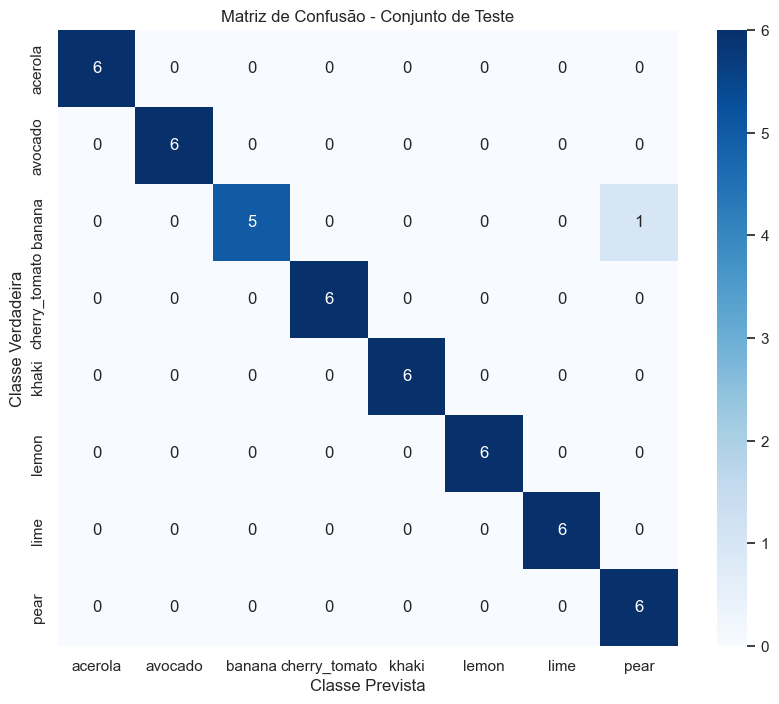

In [7]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Conjunto de Teste')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()